In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn


In [2]:
X = pd.read_csv('features.csv')
y = pd.read_csv('power.csv')
X_units = pd.read_csv('feature_units.csv')

In [3]:
y.head()

,Timestamp,Power(kW)
0,2019-01-01 00:00:00,705.876648
1,2019-01-01 00:10:00,884.711670
2,2019-01-01 00:20:00,982.875000
3,2019-01-01 00:30:00,1115.943359
4,2019-01-01 00:40:00,1263.841675


In [4]:
ind = pd.to_datetime(X['Timestamp'])
X.set_index(pd.to_datetime(X['Timestamp']), inplace=True)
X.drop(columns=['Timestamp'], inplace=True)
y.set_index(pd.to_datetime(y['Timestamp']), inplace=True)
y.drop(columns=['Timestamp'], inplace=True)


In [5]:
X.index.max()

Timestamp('2021-12-14 23:50:00')

In [6]:
y.index.max()

Timestamp('2021-08-14 23:50:00')

In [7]:
y.head()

,Power(kW)
Timestamp,
2019-01-01 00:00:00,705.876648
2019-01-01 00:10:00,884.711670
2019-01-01 00:20:00,982.875000
2019-01-01 00:30:00,1115.943359
2019-01-01 00:40:00,1263.841675


## Exploratory Data Analysis

In [8]:
# First of allm we are going to check the size of the data:

X.shape

(154262, 76)

In [9]:
# Now I want to see if there are useless values in the dataset, values that I may have to clean

#First, I will be checking for null values
X.isnull().sum()

Gearbox_T1_High_Speed_Shaft_Temperature            4349
Gearbox_T3_High_Speed_Shaft_Temperature            4518
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    4009
Temperature Gearbox Bearing Hollow Shaft           3732
Tower Acceleration Normal                          4358
                                                   ... 
Moment Q Direction                                 4848
Moment Q Filltered                                 5160
Proxy Sensor_Degree-45                             4072
Turbine State                                      4208
Proxy Sensor_Degree-315                            4824
Length: 76, dtype: int64

In [91]:
X.head()

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,57.000000,59.000000,52.000000,56.158333,47.053776,57.000000,18.890772,35.000000,48.576668,56.158333,...,0.055473,0.267122,0.0,0.058617,-0.325738,37.867054,39.281124,5.732657,1.0,5.779913
2019-01-01 00:10:00,57.693333,59.485001,52.450001,57.000000,64.969742,57.413334,28.560265,35.233334,48.000000,57.000000,...,0.055473,0.267122,0.0,0.058617,-0.325738,-90.169106,-89.018669,5.813177,1.0,5.796757
2019-01-01 00:20:00,59.000000,60.756668,53.536667,57.775002,51.149670,58.728333,34.228813,36.000000,48.053333,57.775002,...,0.055473,0.267122,0.0,0.058617,-0.325738,-88.556343,-88.422020,5.786413,1.0,5.772958
2019-01-01 00:30:00,59.881668,61.563332,54.413334,58.683334,58.740929,59.518333,35.593220,36.000000,48.788334,58.683334,...,0.055473,0.267122,0.0,0.058617,-0.325738,-123.755341,-124.858444,5.758913,1.0,5.728393
2019-01-01 00:40:00,61.290001,62.586666,55.485001,59.623333,53.264774,60.665001,38.552731,36.000000,49.000000,59.623333,...,0.053982,0.267612,0.0,0.058703,-0.325443,-142.533325,-142.053543,5.724591,1.0,5.687730


In [12]:
# Now, I want to analyze the distribution of missing data across the entries. My hypothesis is that some entries have a lot of null values, and that we could potentially
# remove these entries.
nullva = X.isnull().sum(axis=1)
pd.Series(nullva).describe()

count    154262.000000
mean          2.198844
std           1.486314
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          11.000000
dtype: float64

<AxesSubplot:>

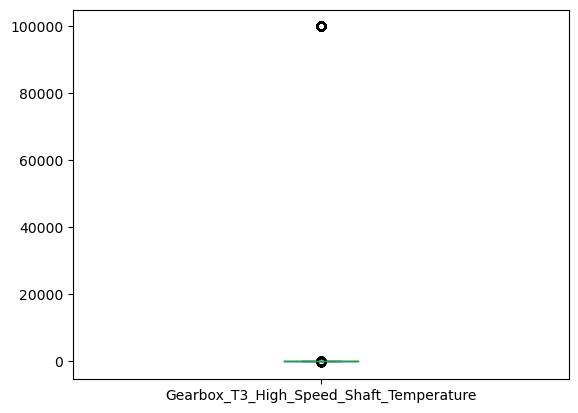

In [13]:
# As it can be seen, the data is quite evenly distributed across the different entries, and our hypothesis is going to be refuted.
# By knowing all this, we know that we can't just delete the entries with null values, because we would lose a lot of information, and thus, we have to input the
# missing values. As these data is a time series, we are going to imput the missing values as the mean of the previous and next entries. However, before doing so, we 
# have to check for outliers and take care of them, so that we don't use them when removing the null values

# I have a high dimensional dataset, which may make it challenging to identify outliers with traditional methods. Thus, an Isolation Forest is going to be used.
# Isolation forest is an unsupervised machine learning algorithm that can be effective for detecting anomalies in high-dimensional datasets. It works by isolating 
# the anomalies that occur in the smallest subsets of the data, and can be particularly useful when the anomalies are sparse or occur across multiple variables.


X.iloc[:,1].plot.box()


In [14]:
# We can see that there are extreme values in our dataset, values that we have to homogenize

In [15]:
from sklearn.ensemble import IsolationForest

In [16]:
X.interpolate(method = 'linear', inplace = True)

In [17]:
model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.3),max_features=1.0)
model.fit(X)

c:\Users\mikel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.3)

In [18]:
anomaly = model.predict(X)

In [19]:
unique, counts = np.unique(anomaly, return_counts = True)
anomaly=X.loc[anomaly==-1]

<AxesSubplot:>

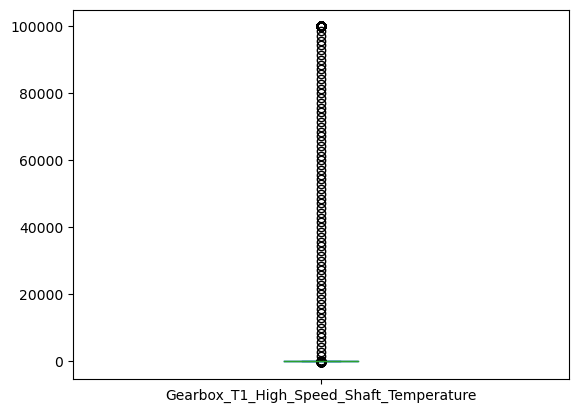

In [20]:
X.iloc[:,0].plot.box()

In [21]:
Xit = X.drop(list(anomaly.index))

<AxesSubplot:>

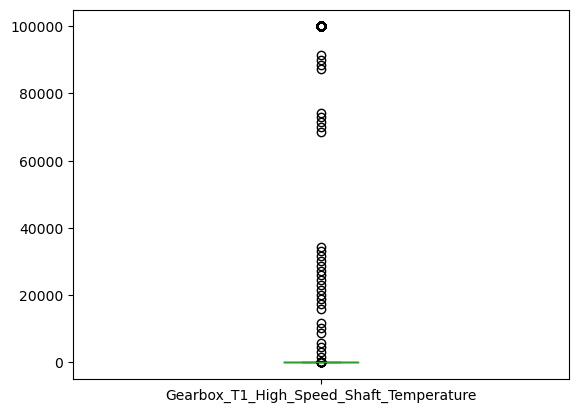

In [22]:
Xit.iloc[:,0].plot.box()

In [23]:
X.shape

(154262, 76)

In [24]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5*IQR
# Label the outliers as null values
X_outliers = X[(X < lower_bound) | (X > upper_bound)]
#X_outliers will have a null value for the non outliers, and a specific value for the outliers

In [25]:
X_outliers.count()

Gearbox_T1_High_Speed_Shaft_Temperature             1445
Gearbox_T3_High_Speed_Shaft_Temperature             1503
Gearbox_T1_Intermediate_Speed_Shaft_Temperature     1475
Temperature Gearbox Bearing Hollow Shaft            2086
Tower Acceleration Normal                           6836
                                                   ...  
Moment Q Direction                                  6426
Moment Q Filltered                                  6237
Proxy Sensor_Degree-45                              1935
Turbine State                                      30994
Proxy Sensor_Degree-315                             1520
Length: 76, dtype: int64

In [26]:
X[X_outliers.notnull()] = None

In [27]:
X_outliers.describe()

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315
count,1445.000000,1503.000000,1475.000000,2086.000000,6836.000000,1747.000000,5118.000000,1421.000000,6948.000000,2017.000000,...,26337.000000,26256.000000,26029.000000,26023.000000,26244.000000,6426.000000,6237.000000,1935.000000,30994.000000,1520.000000
mean,91585.751660,88022.181264,94910.102340,65059.971801,21089.803615,78391.983127,26485.265910,92712.620066,18495.130841,63563.606614,...,5450.147588,5573.279688,5630.909686,5111.980427,5191.210597,21738.794190,20796.803396,62998.821276,4635.872612,84934.119803
std,26284.950664,29979.305554,21994.028748,47470.988772,39830.518521,39535.987795,44029.204146,22186.007625,38716.094259,48131.743080,...,22542.171446,22393.537298,22702.243612,21780.723184,21744.163190,40900.766768,40279.302673,48290.467894,20735.181940,35781.123207
min,-273.000000,-273.000000,-273.000000,16.000000,175.588867,-273.000000,95.939941,-273.000000,13.845000,-273.000000,...,-408.779999,27.831007,27.199625,27.082840,27.091085,-1287.386719,-1286.707886,-0.238800,1.003333,-0.238800
25%,99999.000000,99999.000000,99999.000000,24.000000,190.298496,93118.934783,105.285513,99999.000000,101.000000,24.000000,...,65.002380,65.000000,65.000000,65.000000,65.000000,-157.065113,-158.463440,6.014928,3.000000,99999.000000
50%,99999.000000,99999.000000,99999.000000,99999.000000,214.601738,99999.000000,122.919357,99999.000000,109.000000,99999.000000,...,65.003403,65.000000,65.000000,65.000000,65.000000,-122.107655,-122.930595,99999.000000,3.000000,99999.000000
75%,99999.000000,99999.000000,99999.000000,99999.000000,296.068565,99999.000000,99999.000000,99999.000000,121.000000,99999.000000,...,65.004768,65.000000,65.000000,65.000000,65.000000,280.201436,211.672775,99999.000000,3.000000,99999.000000
max,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000


In [28]:
X.interpolate(method = 'linear', inplace = True)
y.interpolate(method = 'linear', inplace = True)

In [29]:
# All the outliers and missing values have already been taken care of.

In [30]:
y.isnull().sum()

Power(kW)    0
dtype: int64

<AxesSubplot:>

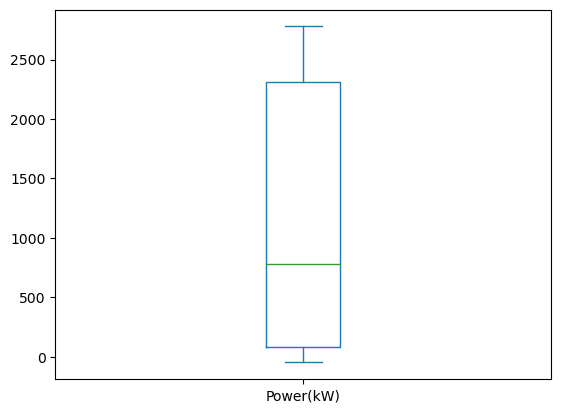

In [31]:
y.plot.box()

## MODEL

<AxesSubplot:xlabel='Timestamp'>

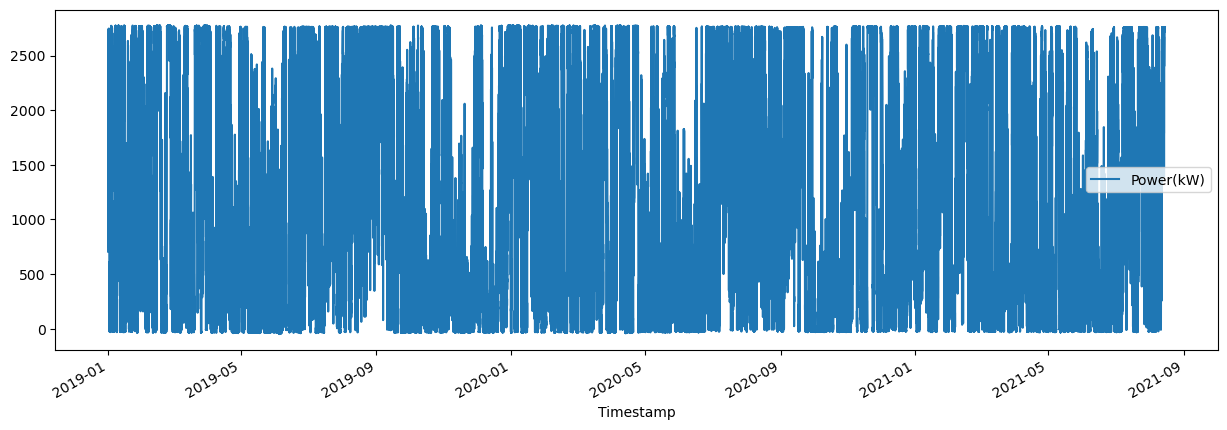

In [32]:
# We want to check wether we can apply the ARIMA model, and to do so, we have to check if the data is stationary

y.plot(figsize=(15,5))

In [33]:
# In the plot we have seen that there are no trends, which is a requisite for being stationary. We will apply the augmented Dicky-Fuller test to get a quantitative result

from statsmodels.tsa.stattools import adfuller, kpss

results_ad = adfuller(y)

print(results_ad)

(-20.243008009091824, 0.0, 73, 136656, {'1%': -3.430397853170283, '5%': -2.8615611504140697, '10%': -2.566781257614413}, 1823712.8611867912)


In [34]:
# As seen in the adfuller test, the t value is -20.24, thus, it is very likely that the data is stationary and we reject the null hypothesis. However, the Dicky-Fuller only
# tests for trend stationarity, and in order to get a more confident result, we will also carry the KPSS test out, in which the null hypothesis is that the series is indeed
# stationary 

results_kpss = kpss(y)

print(results_kpss)

(0.1873637133153781, 0.1, 206, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


c:\Users\mikel\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [35]:
# The null hypothesis of the KPSS test is that the time series is stationary. In this case, the test statistic of 0.187 is less than all of the critical values in the dictionary, 
# indicating that the series is stationary at all levels of significance.

Feature selection


In [36]:
# In order to carry feature selection, I have to divide the dataset into training and testing
from sklearn.model_selection import train_test_split


In [37]:
df = merged_inner = pd.merge(left=X, right=y, how='inner', on='Timestamp')

In [38]:
df = df.fillna(df.mean())

In [39]:
null_df = df.isnull()

# select the rows and columns where the boolean DataFrame is True
null_values = df.loc[null_df.any(axis=1), null_df.any()]
print(null_values)

Empty DataFrame
Columns: []
Index: []


In [40]:
df.drop('Power(kW)', axis='columns')

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,57.000000,59.000000,52.000000,56.158333,47.053776,57.000000,18.890772,35.000000,48.576668,56.158333,...,0.055473,0.267122,0.000000,0.058617,-0.325738,37.867054,39.281124,5.732657,1.0,5.779913
2019-01-01 00:10:00,57.693333,59.485001,52.450001,57.000000,64.969742,57.413334,28.560265,35.233334,48.000000,57.000000,...,0.055473,0.267122,0.000000,0.058617,-0.325738,-90.169106,-89.018669,5.813177,1.0,5.796757
2019-01-01 00:20:00,59.000000,60.756668,53.536667,57.775002,51.149670,58.728333,34.228813,36.000000,48.053333,57.775002,...,0.055473,0.267122,0.000000,0.058617,-0.325738,-88.556343,-88.422020,5.786413,1.0,5.772958
2019-01-01 00:30:00,59.881668,61.563332,54.413334,58.683334,58.740929,59.518333,35.593220,36.000000,48.788334,58.683334,...,0.055473,0.267122,0.000000,0.058617,-0.325738,-55.461038,-55.252278,5.758913,1.0,5.728393
2019-01-01 00:40:00,61.290001,62.586666,55.485001,59.623333,53.264774,60.665001,38.552731,36.000000,49.000000,59.623333,...,0.053982,0.267612,0.000000,0.058703,-0.325443,-22.365733,-22.082535,5.724591,1.0,5.687730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-14 23:10:00,61.000000,63.000000,56.041668,58.000000,153.287247,60.000000,69.762711,49.000000,95.063877,58.000000,...,10.531305,11.002503,10.447368,10.536141,9.802455,-32.086143,-31.424229,5.745283,1.0,5.745321
2021-08-14 23:20:00,61.000000,62.393333,56.000000,58.000000,155.118393,60.000000,82.937195,49.000000,95.063497,58.000000,...,11.369732,11.828915,11.272988,11.368523,10.622690,-23.889460,-22.231714,5.746785,1.0,5.750756
2021-08-14 23:30:00,61.000000,62.000000,56.000000,58.000000,156.138977,60.000000,74.502060,49.000000,95.063117,58.000000,...,12.843295,13.300327,12.743129,12.839147,12.089720,-4.717197,-5.553182,5.748488,1.0,5.761683


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Power(kW)', axis='columns'), df['Power(kW)'], test_size=0.25, random_state=42)

In [42]:
y_train.shape

(102547,)

In [43]:
# Now that I have already split my data, I will carry the feature selection out. In order to make the training of the model more computationally sound.

SelectKBest: This method involves selecting the K best features based on a statistical test, such as a chi-squared test or ANOVA.

In [44]:
from sklearn.feature_selection import SelectKBest,f_classif

In [45]:
y_train.isnull().sum().sum()

0

In [121]:
# FeatureSelection = SelectKBest(score_func= f_classif ,k=10)
# feat = FeatureSelection.fit_transform(X_train, y_train)

selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


print('Feat Shape is ' , X_train_selected.shape)
sel_col= selector.get_support()

Feat Shape is  (102547, 10)


c:\Users\mikel\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [20 21 42 47 48 49 50 55 57 61 74] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\mikel\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [122]:
scores = selector.scores_

In [124]:
df.columns[4]

'Tower Acceleration Normal'

In [123]:
scores

array([6.97621685, 6.38852928, 5.91475259, 4.37887536, 7.0610637 ,
       5.38309671, 4.05308812, 3.83138829, 3.72164602, 4.23637357,
       4.25981894, 4.25622482, 6.02863619, 3.83336161, 2.92009655,
       3.71154506, 2.2374309 , 2.9200577 , 7.24826772, 7.31666754,
              nan,        nan, 3.80595604, 1.86214238, 1.30233091,
       3.96284264, 1.29022746, 3.20775379, 1.28271523, 1.24220587,
       2.71116643, 1.09320002, 3.05992942, 1.32094366, 1.30716432,
       1.31881868, 1.26661233, 0.74578799, 1.1148219 , 0.85320166,
       0.69293212, 0.99683061,        nan, 1.3354844 , 1.20037916,
       1.34988917, 1.42834714,        nan,        nan,        nan,
              nan, 1.05200809, 1.38765167, 1.22102953, 0.9611385 ,
              nan, 1.18267798,        nan, 0.82066645, 0.83835934,
       1.52071431,        nan, 2.31399589, 1.11429651, 1.15536376,
       1.14684498, 1.06284461, 1.09648953, 1.11196785, 1.11847402,
       1.13886628, 3.17562416, 3.27158094, 4.63064755,        

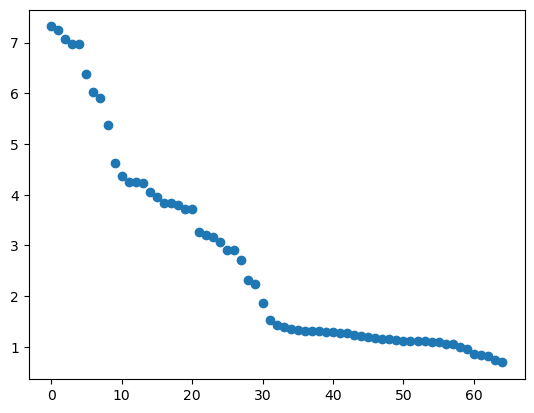

In [113]:
scores = np.sort(scores)
scores = scores[::-1]
plt.scatter(range(scores[np.isnan(scores) == False].shape[0]), scores[np.isnan(scores) == False])

In [68]:
# I have seen that selecting 10 features was a wise choice, as the Score for the feature starts to stagnate after this point

selected_columns = X_test.columns[sel_col].to_list()

In [49]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error 

In [50]:
XGBModel = XGBRegressor(n_estimators=100, max_depth=6, eta=0.3)
XGBModel.fit(X_train, y_train)

print('XGBoost Regressor Train Score is : ' , XGBModel.score(X_train_selected, y_train))
print('XGBoost Regressor Test Score is : ' , XGBModel.score(X_test_selected, y_test))

XGBoost Regressor Train Score is :  0.999525656808262
XGBoost Regressor Test Score is :  0.9980852208170816


In [51]:
y_pred_x = XGBModel.predict(X_test)

MSEValue_X = mean_squared_error(y_test, y_pred_x, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(MSEValue_X))

Mean Squared Error Value by Square root is :  [47.27147946]


The obtained results are really impresive, and we can state that we can predict the Power really accurately based on just the 10 top featrues.

In [69]:


selected_columns

['Gearbox_T1_High_Speed_Shaft_Temperature',
 'Gearbox_T3_High_Speed_Shaft_Temperature',
 'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
 'Tower Acceleration Normal',
 'Gearbox_Oil-2_Temperature',
 'Torque',
 'Moment D Filtered',
 'Moment D Direction',
 'Proxy Sensor_Degree-45',
 'Proxy Sensor_Degree-315']

In [115]:
X_test

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-04 09:00:00,52.603333,55.413334,48.681667,54.000000,119.984253,53.451668,45.730698,37.000000,50.000000,54.000000,...,0.045309,0.654327,0.000000,0.044098,-0.698423,-86.989536,-86.079794,5.913884,1.0,5.642381
2021-05-19 17:00:00,41.169998,42.000000,40.000000,43.685001,29.412685,43.000000,14.817327,36.013332,49.000000,43.686668,...,4.237334,4.692623,4.203513,4.233838,3.684136,15.561485,15.829984,5.849782,1.0,5.882460
2020-06-30 00:40:00,48.643333,50.706665,45.000000,52.000000,26.997940,50.610001,15.812618,46.320000,51.000000,52.000000,...,0.104058,0.645505,0.000000,0.107596,-0.753102,64.111153,64.140015,5.832946,1.0,5.889634
2020-01-17 14:00:00,67.940002,69.419998,61.294998,65.858330,154.576660,67.878334,62.617882,36.616665,56.544998,65.860001,...,8.795123,9.406744,8.750837,8.791408,8.051973,-38.362736,-36.304359,5.751685,1.0,5.763542
2020-11-06 21:40:00,64.973335,65.830002,59.036667,61.560001,143.045563,64.285004,60.528427,42.000000,86.458336,61.560001,...,5.516811,6.100014,5.454121,5.510318,4.750046,-2.805529,-4.914696,5.718976,1.0,5.737353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-19 04:20:00,62.123333,63.258335,54.794998,59.581665,80.057137,61.888332,45.078156,40.055000,50.970001,59.581665,...,2.483302,3.098282,2.410700,2.479135,1.653070,-21.786184,-20.207270,5.685190,1.0,5.710841
2021-01-20 17:10:00,46.626667,49.901669,42.750000,49.000000,47.561485,48.564999,32.561207,32.483334,38.000000,49.000000,...,0.009715,0.680849,0.000000,0.013029,-0.693876,-4.023760,-4.395448,5.721200,1.0,5.753185
2019-03-07 14:40:00,31.000000,32.000000,32.000000,34.520000,2.199725,32.000000,1.496234,23.000000,53.134998,34.518333,...,5.994391,6.098505,5.910799,5.995189,5.638294,0.598008,0.659333,5.853487,1.0,5.910332


(array([1.223e+03, 1.911e+03, 1.563e+03, 2.956e+03, 8.773e+03, 5.687e+03,
        4.583e+03, 7.480e+03, 4.000e+00, 3.000e+00]),
 array([-105.19438171,  -77.19944305,  -49.20450439,  -21.20956573,
           6.78537292,   34.78031158,   62.77525024,   90.7701889 ,
         118.76512756,  146.76006622,  174.75500488]),
 <BarContainer object of 10 artists>)

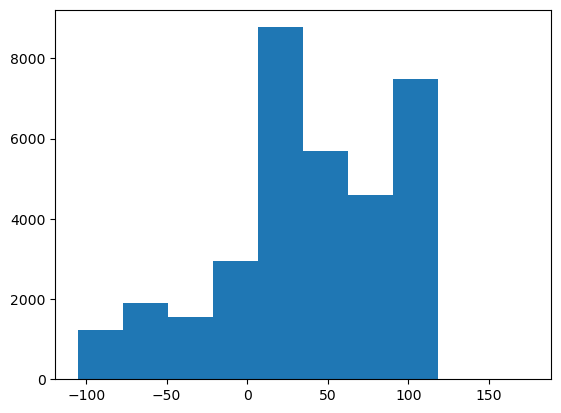

In [119]:
plt.hist(X_test.loc[:,'Torque'])

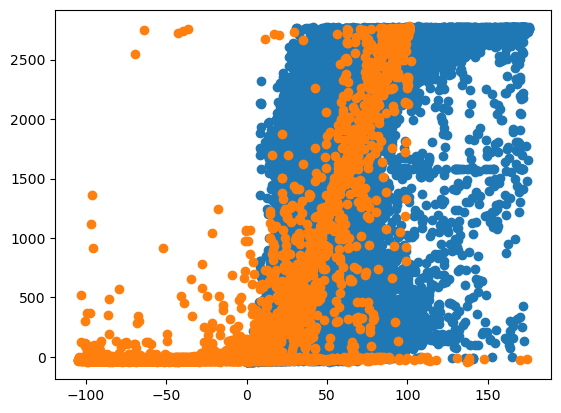

In [126]:
plt.scatter(X_test.loc[:,'Tower Acceleration Normal'], y_test)
plt.scatter(X_test.loc[:,'Torque'], y_test)

My objective now is to create an ARIMA model for time series modelling
